**Midterm**

**Nguyen Trung Hai**

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score

# Problem 7

In [2]:
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min = X[:, 0].min() - 2*resolution
    x2_min = X[:, 1].min() - 2*resolution
    x1_max = X[:, 0].max() + 2*resolution
    x2_max = X[:, 1].max() + 2*resolution
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    c=colors[idx],
                    marker=markers[idx],
                    s=100,
                    label=cl)

In [3]:
# XOR dataset
X_train = np.array([[0,0], [0, 1], [1, 0], [1,1]])
y_train = np.array([0, 1, 1, 0])

## (7b)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


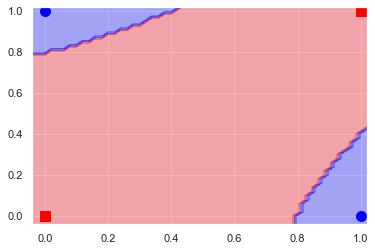

In [4]:
# initialize the SVM classifier with poly kernel
svm_poly = SVC(kernel="poly", degree=3, C=100, random_state=123)

# train the classifier
svm_poly.fit(X_train, y_train)

# plot decision boundary
plot_decision_boundary(X_train, y_train, svm_poly)

## (7c)

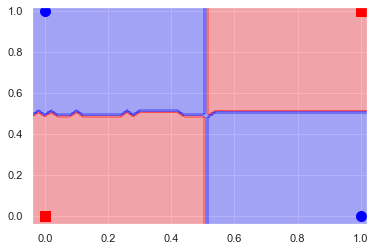

In [5]:
# initialize the SVM classifier with rbf kernel
svm_rbf = SVC(kernel="rbf", gamma=10, C=100, random_state=123)
# train the classifier
svm_rbf.fit(X_train, y_train)

# plot decision boundary
plot_decision_boundary(X_train, y_train, svm_rbf)

# Problem 8

In [6]:
# load cancer dataset
cancer = datasets.load_breast_cancer()

# print name of the 13 features
print("Features:", cancer.feature_names)

# data description
#print(cancer.DESCR)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
X_cancer = cancer.data
y_cancer = cancer.target

print("X_cancer.shape:", X_cancer.shape)
print("y_cancer[:50]:", y_cancer[:50])
print("Labels:", cancer.target_names)

X_cancer.shape: (569, 30)
y_cancer[:50]: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1]
Labels: ['malignant' 'benign']


**This means 'malignant' is labled as 0 and 'benign' as 1.**

In [8]:
print("Number of zero (malignant) labels:", (y_cancer == 0).sum())
print("Number of one (benign) labels:", (y_cancer == 1).sum())
print("Percentage of zero (malignant) labels:", (y_cancer == 0).mean())

Number of zero (malignant) labels: 212
Number of one (benign) labels: 357
Percentage of zero (malignant) labels: 0.37258347978910367


## (8a) Split train test

In [9]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, 
                                                                                test_size=0.3, 
                                                                                stratify=y_cancer,
                                                                                random_state=123)
print("X_cancer_train.shape:", X_cancer_train.shape)
print("X_cancer_test.shape:", X_cancer_test.shape)
print("y_cancer_train.shape:", y_cancer_train.shape)
print("y_cancer_test.shape:", y_cancer_test.shape)

X_cancer_train.shape: (398, 30)
X_cancer_test.shape: (171, 30)
y_cancer_train.shape: (398,)
y_cancer_test.shape: (171,)


## (8b)  Standardize the features

In [10]:
# initialize the scaler
sd_scaler = StandardScaler()

# fit the scaler to the training data
sd_scaler.fit(X_cancer_train)

# transform the training data
X_cancer_train_std = sd_scaler.transform(X_cancer_train)

# transform the test data
X_cancer_test_std = sd_scaler.transform(X_cancer_test)

print("Mean values of training features:", X_cancer_train_std.mean(axis=0))
print("Standard deviations of training features:", X_cancer_train_std.std(axis=0))
print("-------")
print("Mean values of test features:", X_cancer_test_std.mean(axis=0))
print("Standard deviations of test features:", X_cancer_test_std.std(axis=0))

Mean values of training features: [-1.67440043e-15 -6.56091596e-16 -3.91925465e-17 -1.07786477e-15
 -3.70794964e-16 -2.08236555e-15  6.51977076e-16  1.28875135e-16
 -4.86210737e-15  3.64420945e-15  7.87895712e-16  2.90108529e-16
  9.86787425e-18 -2.97779668e-16 -5.70174840e-16 -1.42766870e-15
  9.88879553e-16  1.27313012e-15 -3.33140132e-15  1.25081408e-15
  1.43464247e-15  9.22684598e-15 -1.62321301e-15 -8.23740852e-16
 -3.20793085e-17 -5.35306026e-16 -1.81178355e-16  2.50079131e-16
  5.64484249e-15  4.00219884e-15]
Standard deviations of training features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
-------
Mean values of test features: [-0.01325212  0.08127555 -0.0066463  -0.01936029  0.01137251  0.04680623
 -0.01513348  0.00721536  0.09950402 -0.06883219 -0.00071366  0.05160618
  0.01652891 -0.02445259  0.04525236  0.02178297 -0.05057679  0.02215072
 -0.02552434 -0.09596367 -0.01941184  0.08167733 -0.0118028  -0.02474214
 -0.01562904

## (8c) Fit a logistic regression model

In [11]:
# Let's tune the C hyperparameter first
c_range = [10**i for i in range(-5, 6)]
param_grid = [{"C": c_range}]
print("param_grid:", param_grid)

# initiate the GridSearchCV object
gs_logistic = GridSearchCV(estimator=LogisticRegression(random_state=123, solver="lbfgs", max_iter=1000),
                           param_grid=param_grid, 
                           scoring="roc_auc", 
                           cv=10)

# fit to the training data
gs_logistic.fit(X_cancer_train_std, y_cancer_train)

param_grid: [{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000, 100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Plot mean cross-validation AUC versus regularization hyperparameter C. 

Text(0, 0.5, 'mean CV ROC-AUC')

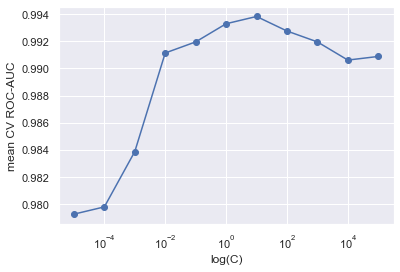

In [12]:
# plot mean CV AUC vs log(C)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(c_range, gs_logistic.cv_results_["mean_test_score"], marker="o")
ax.set_xscale('log')
ax.set_xlabel("log(C)")
ax.set_ylabel("mean CV ROC-AUC")

If we are careful, we can repeat the grid search with finer grid around the best C.

In [13]:
print("Best AUC:", gs_logistic.best_score_)
print("Best regulaization hyperparameter C:", gs_logistic.best_params_)

Best AUC: 0.9938358458961475
Best regulaization hyperparameter C: {'C': 10}


In [14]:
# best model
best_logistic_cls = gs_logistic.best_estimator_

# fit the best model on whole training set
best_logistic_cls.fit(X_cancer_train_std, y_cancer_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# predict labels for training set
y_cancer_train_logreg = best_logistic_cls.predict(X_cancer_train_std)
# predict class probabilities for training set
proba_cancer_train_logreg = best_logistic_cls.predict_proba(X_cancer_train_std)

# predict labels for test set
y_cancer_test_logreg = best_logistic_cls.predict(X_cancer_test_std)
# predict class probabilities for test set
proba_cancer_test_logreg = best_logistic_cls.predict_proba(X_cancer_test_std)

## (8d) Calculate classification metrics
An important note for the breast cancer dataset is that, the negative class "benign" is labeled as `1` and the postive class "malignant" is labeled as `0`. So when calling the function `confusion_matrix` we will use the argument `labels=[1, 0]` to indicate that `1` is negative and `0` is positive. 

In [16]:
def metrics_from_conf_matr(y_true, y_pred, **kwargs):
    conf_matr = confusion_matrix(y_true, y_pred, **kwargs)
    tn, fp, fn, tp = conf_matr.ravel()
    
    results = {}
    results["ACCURACY"] = (tn + tp) / (tn + tp + fp + fn)
    results["TPR"] = tp / (tp + fn)
    results["FPR"] = fp / (fp + tn)
    results["TNR"] = tn / (tn + fp)
    results["FNR"] = fn / (fn + tp)
    results["PRECISION"] = tp / (tp + fp)
    results["RECALL"] = results["TPR"]
    results["F1"] = 2 * (results["PRECISION"] * results["RECALL"]) / (results["PRECISION"] + results["RECALL"])
    
    return results

In [17]:
metrics_train =  metrics_from_conf_matr(y_cancer_train, y_cancer_train_logreg, labels=[1, 0])
metrics_test =  metrics_from_conf_matr(y_cancer_test, y_cancer_test_logreg, labels=[1, 0])

print("TPR for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["TPR"], metrics_test["TPR"]))
print("FPR for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["FPR"], metrics_test["FPR"]))
print("TNR for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["TNR"], metrics_test["TNR"]))
print("FNR for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["FNR"], metrics_test["FNR"]))

print("PRECISION for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["PRECISION"], 
                                                                metrics_test["PRECISION"]))
print("RECALL for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["RECALL"], 
                                                                metrics_test["RECALL"]))
print("F1 for train: {:0.3f}; for test: {:0.3f}". format(metrics_train["F1"], 
                                                                metrics_test["F1"]))

TPR for train: 0.973; for test: 0.922
FPR for train: 0.000; for test: 0.019
TNR for train: 1.000; for test: 0.981
FNR for train: 0.027; for test: 0.078
PRECISION for train: 1.000; for test: 0.967
RECALL for train: 0.973; for test: 0.922
F1 for train: 0.986; for test: 0.944


In [18]:
auc_train = roc_auc_score(y_cancer_train, proba_cancer_train_logreg[:, 1])
auc_test = roc_auc_score(y_cancer_test, proba_cancer_test_logreg[:, 1])

print("ROC AUC for train: {:0.3f}; for test: {:0.3f}".format(auc_train, auc_test))

ROC AUC for train: 0.999; for test: 0.975


Text(0.5, 1.0, 'ROC curve, logistic regression')

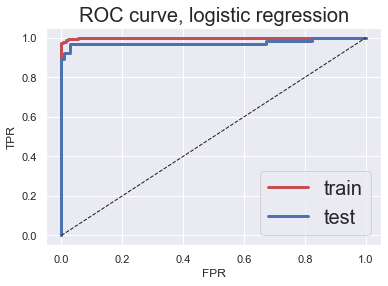

In [19]:
roc_fpr_train, roc_tpr_train, _ = roc_curve(y_cancer_train, proba_cancer_train_logreg[:,0], pos_label=0)
roc_fpr_test, roc_tpr_test, _ = roc_curve(y_cancer_test, proba_cancer_test_logreg[:,0], pos_label=0)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(roc_fpr_train, roc_tpr_train, c="r", lw=3, label="train")
ax.plot(roc_fpr_test, roc_tpr_test, c="b", lw=3, label="test")
ax.plot([0, 1], [0, 1], c="k", lw=1, linestyle="--")
ax.legend(fontsize=20)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC curve, logistic regression", fontsize=20)

## (8e) Visualizing data using `T-SNE`

In [20]:
def scatter_plot(X, y, class_names, ax):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    unique_cls = np.unique(y)
    
    for idx, cl in enumerate(unique_cls):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], c=colors[idx], label=class_names[idx])
    return ax

Text(0.5, 1.0, 'Test data, Labels predicted by logistic regression')

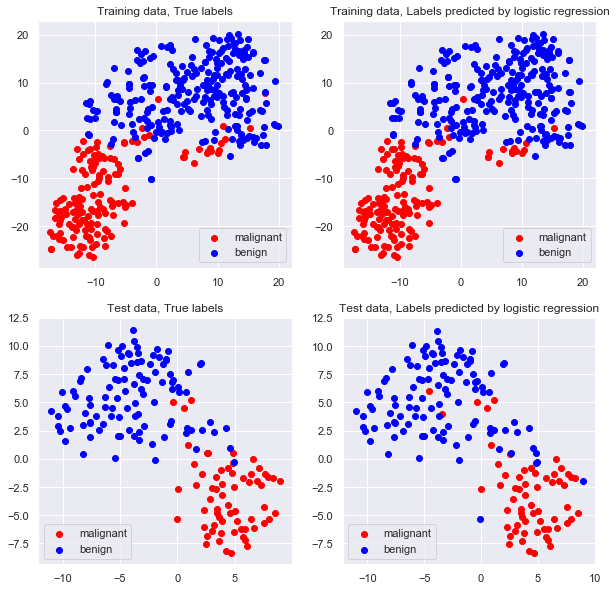

In [21]:
tsne = TSNE(n_components=2, random_state=123)
X_cancer_train_emb = tsne.fit_transform(X_cancer_train_std)
X_cancer_test_emb = tsne.fit_transform(X_cancer_test_std)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
class_names = ["malignant", "benign"]

# use true labels to color the data points in training set
scatter_plot(X_cancer_train_emb, y_cancer_train, class_names, ax[0][0])
ax[0][0].legend(loc="lower right")
ax[0][0].set_title("Training data, True labels")

# use predicted labels to color the data points in training set
scatter_plot(X_cancer_train_emb, y_cancer_train_logreg, class_names, ax[0][1])
ax[0][1].legend(loc="lower right")
ax[0][1].set_title("Training data, Labels predicted by logistic regression")

# use true labels to color the data points in test set
scatter_plot(X_cancer_test_emb, y_cancer_test, class_names, ax[1][0])
ax[1][0].legend(loc="lower left")
ax[1][0].set_title("Test data, True labels")

# use predicted labels to color the data points in test set
scatter_plot(X_cancer_test_emb, y_cancer_test_logreg, class_names, ax[1][1])
ax[1][1].legend(loc="lower left")
ax[1][1].set_title("Test data, Labels predicted by logistic regression")

# Problem 9

## (9a) 
The same as problem **(8b)** above. Here is the results of standardizing the train and test sets.

In [22]:
print("Mean values of training features:", X_cancer_train_std.mean(axis=0))
print("Standard deviations of training features:", X_cancer_train_std.std(axis=0))
print("-------")
print("Mean values of test features:", X_cancer_test_std.mean(axis=0))
print("Standard deviations of test features:", X_cancer_test_std.std(axis=0))

Mean values of training features: [-1.67440043e-15 -6.56091596e-16 -3.91925465e-17 -1.07786477e-15
 -3.70794964e-16 -2.08236555e-15  6.51977076e-16  1.28875135e-16
 -4.86210737e-15  3.64420945e-15  7.87895712e-16  2.90108529e-16
  9.86787425e-18 -2.97779668e-16 -5.70174840e-16 -1.42766870e-15
  9.88879553e-16  1.27313012e-15 -3.33140132e-15  1.25081408e-15
  1.43464247e-15  9.22684598e-15 -1.62321301e-15 -8.23740852e-16
 -3.20793085e-17 -5.35306026e-16 -1.81178355e-16  2.50079131e-16
  5.64484249e-15  4.00219884e-15]
Standard deviations of training features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
-------
Mean values of test features: [-0.01325212  0.08127555 -0.0066463  -0.01936029  0.01137251  0.04680623
 -0.01513348  0.00721536  0.09950402 -0.06883219 -0.00071366  0.05160618
  0.01652891 -0.02445259  0.04525236  0.02178297 -0.05057679  0.02215072
 -0.02552434 -0.09596367 -0.01941184  0.08167733 -0.0118028  -0.02474214
 -0.01562904

## (9b) Fit a SVC classification model

In [23]:
c_range = [10**i for i in range(-10, 10)]
gamma_range = [10**i for i in range(-10, 10)]
degree_range = list(range(1, 11))

param_grid = [{"kernel": ["rbf"], "C": c_range, "gamma": gamma_range},
             {"kernel": ["poly"], "C": c_range, "degree": degree_range, "gamma": ["auto"]},
             {"kernel": ["sigmoid"], "C": c_range, "gamma": gamma_range}]

In [24]:
gs_svc = GridSearchCV(estimator=SVC(probability=True, random_state=123),
                           param_grid=param_grid, 
                           scoring="roc_auc", 
                           cv=10)
# fit to the training data
gs_svc.fit(X_cancer_train_std, y_cancer_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-...
                         {'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000, 100000, 1000000, 10000000, 100000000,
                                1000000000],
                          'gamma': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                    0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000, 10

In [25]:
print("Best AUC:", gs_svc.best_score_)
print("Best hyperparameters:", gs_svc.best_params_)

Best AUC: 0.9938358458961473
Best hyperparameters: {'C': 100000, 'gamma': 1e-05, 'kernel': 'rbf'}


In [26]:
# best model
best_svc_cls = gs_svc.best_estimator_

# fit the best model on whole training set
best_svc_cls.fit(X_cancer_train_std, y_cancer_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
# predict labels for training set
y_cancer_train_svc = best_svc_cls.predict(X_cancer_train_std)
# predict class probabilities for training set
proba_cancer_train_svc = best_svc_cls.predict_proba(X_cancer_train_std)

# predict labels for test set
y_cancer_test_svc = best_svc_cls.predict(X_cancer_test_std)
# predict class probabilities for test set
proba_cancer_test_svc = best_svc_cls.predict_proba(X_cancer_test_std)

## (9c) Calculate classification metrics

In [28]:
metrics_train =  metrics_from_conf_matr(y_cancer_train, y_cancer_train_svc, labels=[1, 0])
metrics_test =  metrics_from_conf_matr(y_cancer_test, y_cancer_test_svc, labels=[1, 0])

print("TPR for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["TPR"], metrics_test["TPR"]))
print("FPR for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["FPR"], metrics_test["FPR"]))
print("TNR for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["TNR"], metrics_test["TNR"]))
print("FNR for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["FNR"], metrics_test["FNR"]))

print("PRECISION for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["PRECISION"], metrics_test["PRECISION"]))
print("RECALL for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["RECALL"], metrics_test["RECALL"]))
print("F1 for train: {:0.3f}; for test: {:0.3f}".format(metrics_train["F1"], metrics_test["F1"]))

TPR for train: 0.973; for test: 0.891
FPR for train: 0.000; for test: 0.009
TNR for train: 1.000; for test: 0.991
FNR for train: 0.027; for test: 0.109
PRECISION for train: 1.000; for test: 0.983
RECALL for train: 0.973; for test: 0.891
F1 for train: 0.986; for test: 0.934


In [29]:
auc_train = roc_auc_score(y_cancer_train, proba_cancer_train_svc[:, 1])
auc_test = roc_auc_score(y_cancer_test, proba_cancer_test_svc[:, 1])

print("ROC AUC for train: {:0.3f}; for test: {:0.3f}".format(auc_train, auc_test))

ROC AUC for train: 0.998; for test: 0.980


Text(0.5, 1.0, 'ROC curve, SVC classifer')

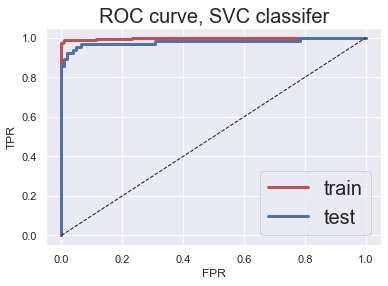

In [30]:
roc_fpr_train, roc_tpr_train, _ = roc_curve(y_cancer_train, proba_cancer_train_svc[:,0], pos_label=0)
roc_fpr_test, roc_tpr_test, _ = roc_curve(y_cancer_test, proba_cancer_test_svc[:,0], pos_label=0)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(roc_fpr_train, roc_tpr_train, c="r", lw=3, label="train")
ax.plot(roc_fpr_test, roc_tpr_test, c="b", lw=3, label="test")
ax.plot([0, 1], [0, 1], c="k", lw=1, linestyle="--")
ax.legend(fontsize=20)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC curve, SVC classifer", fontsize=20)

## (9d) Visualizing data using `T-SNE`

`X_cancer_train_emb` and `X_cancer_test_emb` were calculated in (8e)

Text(0.5, 1.0, 'Test data, Labels predicted by SVC')

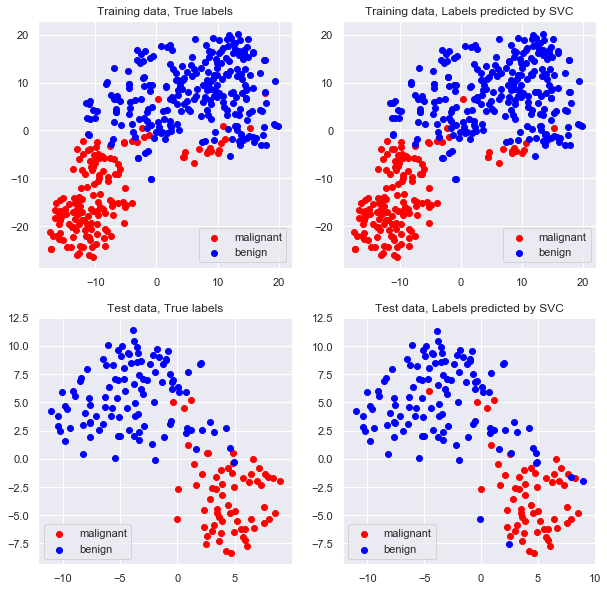

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
class_names = ["malignant", "benign"]

# use true labels to color the data points in training set
scatter_plot(X_cancer_train_emb, y_cancer_train, class_names, ax[0][0])
ax[0][0].legend(loc="lower right")
ax[0][0].set_title("Training data, True labels")

# use predicted labels to color the data points in training set
scatter_plot(X_cancer_train_emb, y_cancer_train_svc, class_names, ax[0][1])
ax[0][1].legend(loc="lower right")
ax[0][1].set_title("Training data, Labels predicted by SVC")

# use true labels to color the data points in test set
scatter_plot(X_cancer_test_emb, y_cancer_test, class_names, ax[1][0])
ax[1][0].legend(loc="lower left")
ax[1][0].set_title("Test data, True labels")

# use predicted labels to color the data points in test set
scatter_plot(X_cancer_test_emb, y_cancer_test_svc, class_names, ax[1][1])
ax[1][1].legend(loc="lower left")
ax[1][1].set_title("Test data, Labels predicted by SVC")

## (9e) Calculate the `PSI` between feature distributions of training set and test set

In [32]:
# calculte Kullback-Leibler divergence
def kl_divergence(p, q):
    """assume that p and q are defined on the same grid"""
    result = 0.
    for p_i, q_i in zip(p.ravel(), q.ravel()):
        if p_i != 0 and q_i != 0:
            result += p_i * np.log(p_i / q_i)
    return result

# calculte population stability index PSI
def psi(p, q):
    return kl_divergence(p, q) + kl_divergence(q, p)


Now we need to estimate empirical probability distributions for the training and test sets.
Howerver, estimating empirical probability distributions in high dimension is very challenging and prone to overfitting. Therefore, we will reduce the feature dimensionality before estimating probability. A simple approach is to calculate the histogram. More sophisticated methods involve kernel density estimations.

In [33]:
def pmf_estimate_1d(x, y, bins=10):
    """x, y are 1d arrays"""
    assert x.ndim == y.ndim == 1, "input must be 1d array"
    lower = np.min([x.min(), y.min()])
    upper = np.max([x.max(), y.max()])
    
    bin_edges = np.linspace(lower, upper, bins + 1)
    
    px, _ = np.histogram(x, bins=bin_edges)
    px = px / len(x)
    
    py, _ = np.histogram(y, bins=bin_edges)
    py = py / len(y)
    
    return px, py, bin_edges


def pmf_estimate_2d(x, y, bins=(10, 10)):
    """x, y are 2d arrays"""
    assert x.ndim == y.ndim == 2, "input must be 2d array"
    lower_0 = np.min([x[:, 0].min(), y[:, 0].min()])
    lower_1 = np.min([x[:, 1].min(), y[:, 1].min()])
    upper_0 = np.max([x[:, 0].max(), y[:, 0].max()])
    upper_1 = np.max([x[:, 1].max(), y[:, 1].max()])
    
    bin_edges_0 = np.linspace(lower_0, upper_0, bins[0] + 1)
    bin_edges_1 = np.linspace(lower_1, upper_1, bins[1] + 1)
    
    px, _, _ = np.histogram2d(x[:, 0], x[:, 1], bins=[bin_edges_0, bin_edges_1])
    px = px / x.size
    
    py, _, _ = np.histogram2d(y[:, 0], y[:, 1], bins=[bin_edges_0, bin_edges_1])
    py = py / y.size
    
    return px, py, bin_edges_0, bin_edges_1

In [34]:
# Let's test with samples drawn from the same normal distribution
x1 = np.random.normal(loc=0, scale=1, size=1000)
x2 = np.random.normal(loc=0, scale=1, size=1000)

p1, p2, _ = pmf_estimate_1d(x1, x2)
psi(p1, p2)

0.01671607585886413

In [35]:
# Let's test with samples drawn from different normal distributions
x1 = np.random.normal(loc=0, scale=1, size=1000)
x2 = np.random.normal(loc=0, scale=2, size=1000)

p1, p2, _ = pmf_estimate_1d(x1, x2)
psi(p1, p2)

0.677309719492355

Let's reduce the dimensionality of the feature space of breast cancer data using PCA

In [36]:
# initialize PCA object
pca = PCA(n_components=2, random_state=123)
# fit to train data
pca.fit(X_cancer_train_std)

# transform train data
X_train_pca = pca.transform(X_cancer_train_std)
# transform test data
X_test_pca = pca.transform(X_cancer_test_std)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

X_train_pca.shape: (398, 2)
X_test_pca.shape: (171, 2)


In [37]:
p_train, p_test, bin_edges_0, bin_edges_1 = pmf_estimate_2d(X_train_pca, X_test_pca, bins=(10, 10))
print("PSI between training and test sets: {:0.5}".format(psi(p_train, p_test)))

PSI between training and test sets: 0.099743
